In [14]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from matplotlib_venn import venn3
from venn import venn
%matplotlib inline

from utils import prepare_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
df = prepare_df()
df.head()

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
0,NaT,2020-10-15 06:58:28+00:00,0,426,121.0,NaN,2,96,111,1.0,1
1,NaT,2020-10-15 06:38:34+00:00,0,426,NaN,NaN,2,92,95,0.0,1
2,2020-09-20 00:00:00+00:00,2020-09-23 12:27:51+00:00,0,426,121.0,42730.0,2,30,37,1.0,1
3,2020-09-20 00:00:00+00:00,2020-09-23 12:26:41+00:00,0,426,121.0,42730.0,2,92,203,1.0,1
4,2020-09-20 00:00:00+00:00,2020-09-22 09:40:36+00:00,0,426,121.0,50128.0,2,9,31,1.0,1


In [16]:
df.shape

(19697, 11)

In [17]:
ndf = df.apply(func=lambda x: [np.sum(pd.isna(x)), np.sum(pd.isna(x))/ 19697], axis=0, result_type='expand')
ndf

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
0,57.000000,0.0,0.0,0.0,1292.000000,1335.000000,0.0,0.0,0.0,329.000000,0.0
1,0.002894,0.0,0.0,0.0,0.065594,0.067777,0.0,0.0,0.0,0.016703,0.0


In [19]:
!pip3 install tabulate

In [21]:
ndf.T.to_markdown()

'|                   |    0 |          1 |\n|:------------------|-----:|-----------:|\n| period_end_date   |   57 | 0.00289384 |\n| translated_when   |    0 | 0          |\n| if_data_corrected |    0 | 0          |\n| prod_gr_id        |    0 | 0          |\n| country_id_n      | 1292 | 0.0655937  |\n| delivery_type_id  | 1335 | 0.0677768  |\n| freq_id           |    0 | 0          |\n| retailer_id       |    0 | 0          |\n| brand_id          |    0 | 0          |\n| predict_automatch |  329 | 0.0167031  |\n| class_acctual     |    0 | 0          |'

|                   |    0 |          1 |
|:------------------|-----:|-----------:|
| period_end_date   |   57 | 0.00289384 |
| translated_when   |    0 | 0          |
| if_data_corrected |    0 | 0          |
| prod_gr_id        |    0 | 0          |
| country_id_n      | 1292 | 0.0655937  |
| delivery_type_id  | 1335 | 0.0677768  |
| freq_id           |    0 | 0          |
| retailer_id       |    0 | 0          |
| brand_id          |    0 | 0          |
| predict_automatch |  329 | 0.0167031  |
| class_acctual     |    0 | 0          |

In [4]:
nan_index_sets = {}
for column in df.columns:
    if pd.isna(df[column]).any():
        nan_index_sets[column] = set(df.index[pd.isna(df[column])])
        print(column, len(nan_index_sets[column]))

period_end_date 57
country_id_n 1292
delivery_type_id 1335
predict_automatch 329


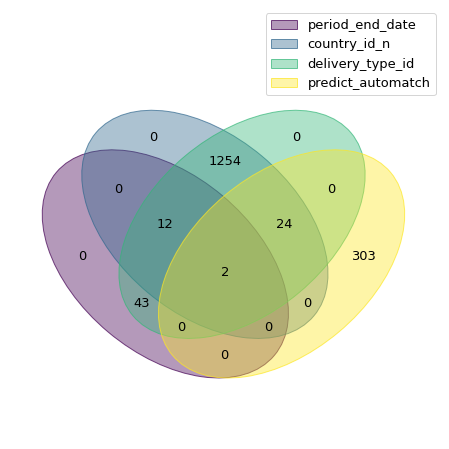

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
venn(nan_index_sets, ax=ax)
plt.savefig('../pics/nan_set_intersect.png')

/usr/local/lib/python3.8/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


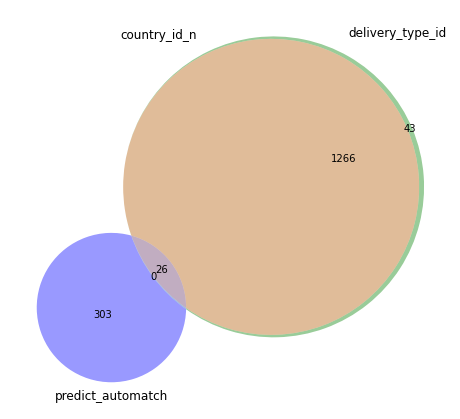

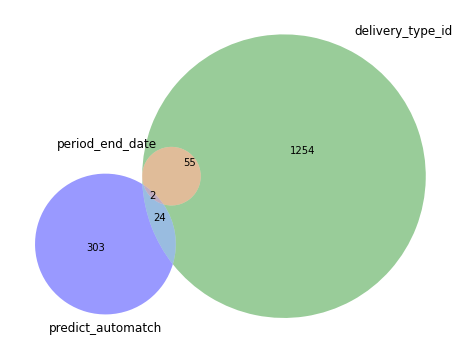

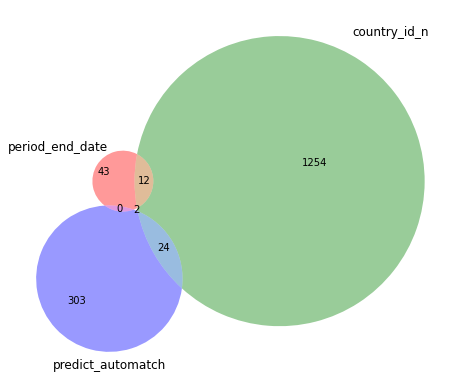

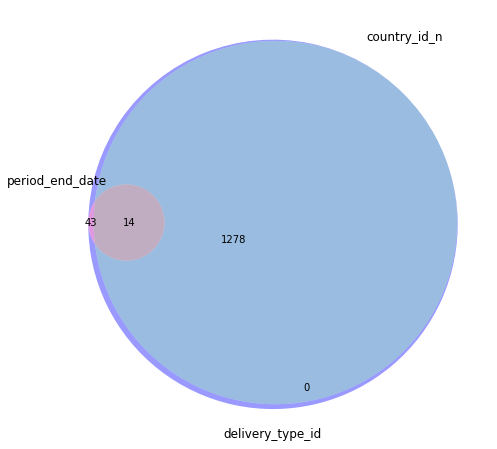

In [6]:
for k in nan_index_sets:
    temp = nan_index_sets.copy()
    del temp[k]
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    venn3(temp.values(), set_labels=temp.keys(), ax=ax)
    plt.savefig(f'../pics/nan_set_intersect_wo_{k}.png')
plt.show()

In [ ]:
for name, dfc in df.groupby('country_id_n', dropna=False):
    print(name,  sum(pd.isna(dfc['delivery_type_id'])))

In [13]:
columns = list(nan_index_sets.keys())
for i in range(len(columns)):
    column = columns[i]
    temp_col = columns[:i] + columns[i+1:]
    print(column, temp_col)
    print(
        df.groupby(by=column, dropna=False).apply(
            lambda x: pd.Series({
                f'nan_count_{col}': np.sum(pd.isna(x['delivery_type_id']))
                for col in temp_col
                }
            ) 
        )
    )

period_end_date ['country_id_n', 'delivery_type_id', 'predict_automatch']
                 nan_count_country_id_n  nan_count_delivery_type_id  \
period_end_date                                                       
2020-08-30                           21                          21   
2020-09-01                           34                          34   
2020-09-06                          113                         113   
2020-09-13                          102                         102   
2020-09-20                           54                          54   
2020-09-27                          110                         110   
2020-10-01                           56                          56   
2020-10-04                           88                          88   
2020-10-11                           75                          75   
2020-10-18                           96                          96   
2020-10-25                           71                          71   
202

Small bug detected

In [33]:
df121 = df[df['country_id_n'] == 121.0]
sum(pd.isna(df121['delivery_type_id']))

43

In [13]:
nan_index_sets['predict_automatch'] & nan_index_sets['period_end_date'] & nan_index_sets['country_id_n']

{2024, 3294}

In [14]:
nan_index_sets['predict_automatch'] & nan_index_sets['period_end_date'] 

{2024, 3294}

In [15]:
nan_index_sets['predict_automatch'] & nan_index_sets['period_end_date'] & nan_index_sets['country_id_n'] & nan_index_sets['delivery_type_id']

{2024, 3294}

In [27]:
len(nan_index_sets['delivery_type_id'] & nan_index_sets['country_id_n'])

1292